In [0]:
%tensorflow_version 2,x
import tensorflow as tf

# restart!!!하기!

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2,x`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
print(tf.__version__)
print(tf.version.VERSION)
print(tf.keras.__version__)

1.15.0
1.15.0
2.2.4-tf


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
X = boston.data
y = boston.target

In [0]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [0]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [0]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))  # layer
model.add(Activation('relu'))

model.add(Dense(64))  # layer
model.add(Activation('relu'))

model.add(Dense(1))  # output

In [0]:
model.compile(loss='mean_squared_error',  # regression 
              optimizer='adam', 
              metrics=['mae','mse']       # 훈련 검증
             )

In [0]:
history = model.fit(X_train, y_train, 
                    batch_size = 32,                    # 400개 데이터를 32개씩
                    epochs = 500,                       # 500번만
                    validation_data = (X_test, y_test), # 검증 데이터셋
                    verbose = 1                         # 0, 1, 2
                    )

Train on 379 samples, validate on 127 samples
Epoch 1/500
379/379 [==============================] - 0s 156us/sample - loss: 11.0894 - mean_absolute_error: 2.2898 - mean_squared_error: 11.0894 - val_loss: 17.2839 - val_mean_absolute_error: 3.2237 - val_mean_squared_error: 17.2839
Epoch 2/500
379/379 [==============================] - 0s 119us/sample - loss: 12.2350 - mean_absolute_error: 2.4680 - mean_squared_error: 12.2350 - val_loss: 15.7556 - val_mean_absolute_error: 3.0538 - val_mean_squared_error: 15.7556
Epoch 3/500
379/379 [==============================] - 0s 102us/sample - loss: 12.4961 - mean_absolute_error: 2.4684 - mean_squared_error: 12.4961 - val_loss: 20.3188 - val_mean_absolute_error: 3.5725 - val_mean_squared_error: 20.3188
Epoch 4/500
379/379 [==============================] - 0s 107us/sample - loss: 13.3222 - mean_absolute_error: 2.5759 - mean_squared_error: 13.3222 - val_loss: 15.7188 - val_mean_absolute_error: 3.1023 - val_mean_squared_error: 15.7188
Epoch 5/500
37

In [0]:
model.evaluate(X_test, y_test, verbose = 0)

[11.76331333851251, 2.5798643, 11.763313]

In [0]:
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

11.76331323656169
0.8699416301097044


Text(0.5, 1.0, 'Boston H Price P ($1,000)')

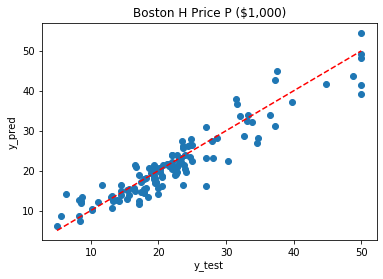

In [0]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston H Price P ($1,000)')

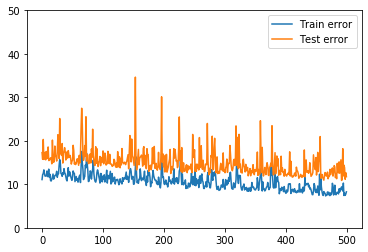

In [0]:
# val 이 train보다 높으면 오버피팅
plt.plot(history.history['mean_squared_error'], label='Train error')    # version 1 -> version 2 'mse'
plt.plot(history.history['val_mean_squared_error'], label='Test error')
plt.ylim([0, 50])
plt.legend()